# Classification Notebook- Investigating the performance of classifiers when predicting the price of cars

This notebook details the workings of the project 'Investigating the performance of classifiers when predicting the price of cars' by Stephen Connolly

Import required packages

Link to dataset used by Arya Monani: https://www.kaggle.com/aryamonani/car-prices-supervised-ml

In [1]:
import string
import re
import os.path
import pandas as pd
import numpy as np 
import math
import statistics
import sklearn
import os, io
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import LeaveOneOut
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

## Data Preprocessing

In [2]:
df_full = pd.read_csv( "CarDataset.csv" )

In [3]:
df_full

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [4]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
Brand           4345 non-null object
Price           4173 non-null float64
Body            4345 non-null object
Mileage         4345 non-null int64
EngineV         4195 non-null float64
Engine Type     4345 non-null object
Registration    4345 non-null object
Year            4345 non-null int64
Model           4345 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [5]:
df_full.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [6]:
df_full.head(19)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.50,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.00,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,Golf IV


In [7]:
raw = df_full[df_full['Price'] != 'NaN']

In [8]:
print(len(raw))

4345


In [9]:
print(len(df_full))

4345


In [10]:
raw = df_full.dropna()

In [11]:
print(len(raw))

4025


In [12]:
df = raw

In [13]:
df['Price'] = df['Price'].astype(int)

In [14]:
df.head(19)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300,crossover,120,2.00,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999,crossover,0,5.50,Petrol,yes,2016,GLS 63
6,BMW,6100,sedan,438,2.00,Gas,yes,1997,320
7,Audi,14200,vagon,200,2.70,Diesel,yes,2006,A6
8,Renault,10799,vagon,193,1.50,Diesel,yes,2012,Megane
9,Volkswagen,1400,other,212,1.80,Gas,no,1999,Golf IV


In [15]:
df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4339,Toyota,17900,sedan,35,1.6,Petrol,yes,2014,Corolla
4340,Mercedes-Benz,125000,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000,sedan,194,2.0,Petrol,yes,1985,520


In [16]:
def normalize_vector(
        series: list, new_min: float = 0, new_max: float = 1) -> np.ndarray:
    upper = (series - np.min(series)) * (new_max - new_min)
    return upper / (np.max(series) - np.min(series)) + new_min

In [17]:
mileage = df['Mileage']
norm_mileage = normalize_vector(mileage)
df['Mileage'] = norm_mileage

engine_vol = df['EngineV']
norm_engine_vol = normalize_vector(engine_vol)
df['EngineV'] = norm_engine_vol



year = df['Year']
norm_year = normalize_vector(year)
df['Year'] = norm_year


In [18]:
df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200,sedan,0.282653,0.014086,Petrol,yes,0.468085,320
1,Mercedes-Benz,7900,van,0.435714,0.023141,Diesel,yes,0.638298,Sprinter 212
2,Mercedes-Benz,13300,sedan,0.365306,0.044270,Gas,yes,0.723404,S 500
3,Audi,23000,crossover,0.244898,0.036221,Petrol,yes,0.808511,Q7
4,Toyota,18300,crossover,0.122449,0.014086,Petrol,yes,0.893617,Rav 4
...,...,...,...,...,...,...,...,...,...
4339,Toyota,17900,sedan,0.035714,0.010061,Petrol,yes,0.957447,Corolla
4340,Mercedes-Benz,125000,sedan,0.009184,0.024147,Diesel,yes,0.957447,S 350
4341,BMW,6500,sedan,0.001020,0.029178,Petrol,yes,0.638298,535
4342,BMW,8000,sedan,0.197959,0.014086,Petrol,yes,0.340426,520


In [19]:
df['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [20]:
df['Body'].unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [21]:
df['Engine Type'].unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

In [22]:
df['Registration'].unique()

array(['yes', 'no'], dtype=object)

In [23]:
df['Model'].unique()

array(['320', 'Sprinter 212', 'S 500', 'Q7', 'Rav 4', 'GLS 63', 'A6',
       'Megane', 'Golf IV', '19', 'A6 Allroad', 'Passat B6',
       'Land Cruiser 100', 'Clio', '318', 'Hilux', 'Polo', 'Outlander',
       'A8', 'Touareg', 'Vito', 'Colt', '100', 'Z4', 'Pajero Wagon', 'X5',
       'Caddy', 'Camry', '528', 'TT', 'G 55 AMG', 'X6', 'Galant', '525',
       'Kangoo', 'ML 350', '730', 'Trafic', 'X5 M', 'S 350', 'Lancer',
       'E-Class', 'Scenic', '330', 'Passat B5', 'A3',
       'Land Cruiser Prado', 'Caravelle', 'Avensis', 'GL 320', 'GL 450',
       'Lancer X', '200', '520', 'Tiguan', 'Outlander XL', 'GLS 350',
       'A5', 'X6 M', 'Golf III', 'A 150', 'FJ Cruiser', 'Koleos',
       'Land Cruiser 200', 'Passat B7', 'Scirocco', 'M5', 'Venza', '80',
       'V 250', 'ML 270', 'C-Class', 'Lupo', '5 Series', 'CLA 200',
       'T5 (Transporter)', 'Highlander', 'Corolla', 'CLK 240', 'I3',
       'Multivan', 'Vaneo', 'X1', 'T5 (Transporter) ', 'S 400', 'S 550',
       'Passat CC', 'A4 Allroad'

In [24]:
print(len(df['Model'].unique()))

306


A map is required to map all of the 306 unique values in the dataset for the model column

In [25]:
magic_map = {}

In [26]:
list_unique_vals = list(df['Model'].unique())

In [27]:
y = 0
for x in list_unique_vals:
    
    magic_map[x] = y
    y += 1
    
    

In [28]:
magic_map

{'320': 0,
 'Sprinter 212': 1,
 'S 500': 2,
 'Q7': 3,
 'Rav 4': 4,
 'GLS 63': 5,
 'A6': 6,
 'Megane': 7,
 'Golf IV': 8,
 '19': 9,
 'A6 Allroad': 10,
 'Passat B6': 11,
 'Land Cruiser 100': 12,
 'Clio': 13,
 '318': 14,
 'Hilux': 15,
 'Polo': 16,
 'Outlander': 17,
 'A8': 18,
 'Touareg': 19,
 'Vito': 20,
 'Colt': 21,
 '100': 22,
 'Z4': 23,
 'Pajero Wagon': 24,
 'X5': 25,
 'Caddy': 26,
 'Camry': 27,
 '528': 28,
 'TT': 29,
 'G 55 AMG': 30,
 'X6': 31,
 'Galant': 32,
 '525': 33,
 'Kangoo': 34,
 'ML 350': 35,
 '730': 36,
 'Trafic': 37,
 'X5 M': 38,
 'S 350': 39,
 'Lancer': 40,
 'E-Class': 41,
 'Scenic': 42,
 '330': 43,
 'Passat B5': 44,
 'A3': 45,
 'Land Cruiser Prado': 46,
 'Caravelle': 47,
 'Avensis': 48,
 'GL 320': 49,
 'GL 450': 50,
 'Lancer X': 51,
 '200': 52,
 '520': 53,
 'Tiguan': 54,
 'Outlander XL': 55,
 'GLS 350': 56,
 'A5': 57,
 'X6 M': 58,
 'Golf III': 59,
 'A 150': 60,
 'FJ Cruiser': 61,
 'Koleos': 62,
 'Land Cruiser 200': 63,
 'Passat B7': 64,
 'Scirocco': 65,
 'M5': 66,
 'Venza':

Convert lists for mapping

In [29]:
class_map = {
    'Registration':{'yes': 0, 'no': 1},
    'Engine Type':{'Petrol': 0, 'Diesel': 1, 'Gas': 2, 'Other': 3},
    'Body':{'sedan': 0, 'van': 1, 'crossover': 2, 'vagon': 3, 'other': 4, 'hatch': 5},
    'Brand':{'BMW': 0, 'Mercedes-Benz': 1, 'Audi': 2, 'Toyota': 3, 'Renault': 4, 'Volkswagen': 5, 'Mitsubishi': 6},
    'Model': magic_map
    
    
}

In [30]:
list_of_feature_names = ['Registration', 'Engine Type', 'Body', 'Brand', 'Model']

In [31]:
for feature in list_of_feature_names:
    
    df[feature] = df[feature].map(class_map[feature])
    

In [32]:
df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,0,4200,0,0.282653,0.014086,0,0,0.468085,0
1,1,7900,1,0.435714,0.023141,1,0,0.638298,1
2,1,13300,0,0.365306,0.044270,2,0,0.723404,2
3,2,23000,2,0.244898,0.036221,0,0,0.808511,3
4,3,18300,2,0.122449,0.014086,0,0,0.893617,4
...,...,...,...,...,...,...,...,...,...
4339,3,17900,0,0.035714,0.010061,0,0,0.957447,77
4340,1,125000,0,0.009184,0.024147,1,0,0.957447,39
4341,0,6500,0,0.001020,0.029178,0,0,0.638298,171
4342,0,8000,0,0.197959,0.014086,0,0,0.340426,53


In [33]:
x_train = df.drop(['Price'], axis=1)
y_train = df['Price']

In [34]:
x_train.shape

(4025, 8)

In [35]:
y_train.shape

(4025,)

In [36]:
np.any(np.isnan(df))

False

In [37]:
df.isna().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

In [38]:
df['Brand'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4025 entries, 0 to 4344
Data columns (total 9 columns):
Brand           4025 non-null int64
Price           4025 non-null int32
Body            4025 non-null int64
Mileage         4025 non-null float64
EngineV         4025 non-null float64
Engine Type     4025 non-null int64
Registration    4025 non-null int64
Year            4025 non-null float64
Model           4025 non-null int64
dtypes: float64(3), int32(1), int64(5)
memory usage: 298.7 KB


In [40]:
np.all(np.isfinite(df))

True

In [41]:
df = df.dropna()

In [42]:
print(len(df))

4025


In [43]:
np.any(np.isnan(df))

False

In [44]:
x_features = df.drop(['Price'], axis=1)
y_labels = df['Price']

In [45]:
X = x_features
y = y_labels

In [73]:
print(max(y))# Max Price

300000


In [74]:
print(min(y))# Min Price

600


## Model creation and prediciton

The models are created and trained

In [46]:
print(len(y))


4025


In [47]:
from sklearn.metrics import mean_squared_error
from math import sqrt


rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
SVM = svm.SVC()
lr = LogisticRegression()
mlp = MLPClassifier()



models = [rf, dt, SVM, lr, mlp]

Number of folds:3
Model name: RandomForestClassifier
RMSE: 6593.943277081359


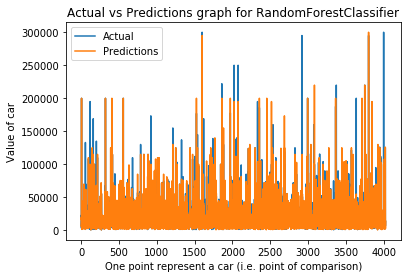

Number of folds:4
Model name: RandomForestClassifier
RMSE: 5966.7696562864


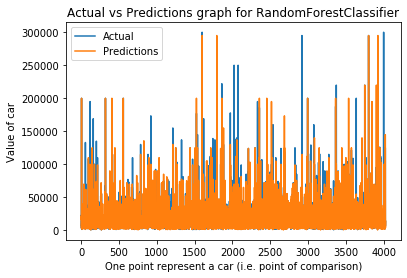

Number of folds:5
Model name: RandomForestClassifier
RMSE: 6091.427819383381


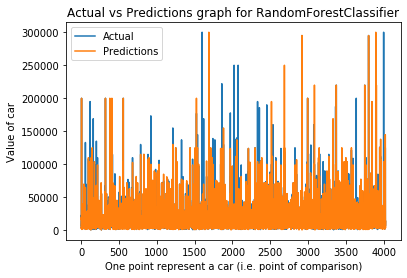

Number of folds:6
Model name: RandomForestClassifier
RMSE: 6092.777826572635


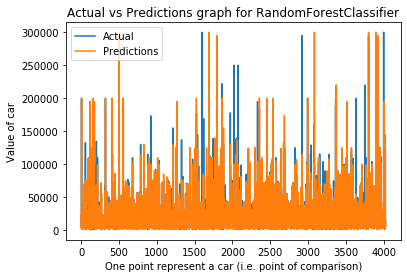

Contents of array
[[6593.943277081359, 5966.7696562864, 6091.427819383381, 6092.777826572635]]

Number of folds:3
Model name: DecisionTreeClassifier
RMSE: 6644.837502773177


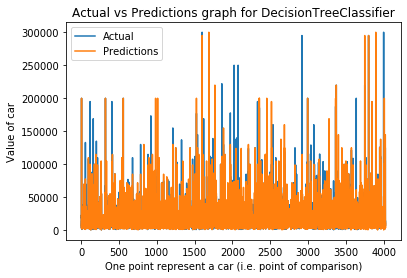

Number of folds:4
Model name: DecisionTreeClassifier
RMSE: 6559.65978344412


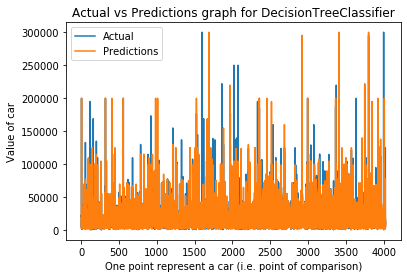

Number of folds:5
Model name: DecisionTreeClassifier
RMSE: 6870.754947606712


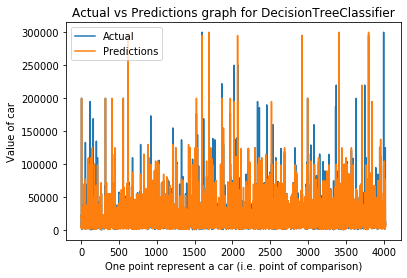

Number of folds:6
Model name: DecisionTreeClassifier
RMSE: 6548.669493959671


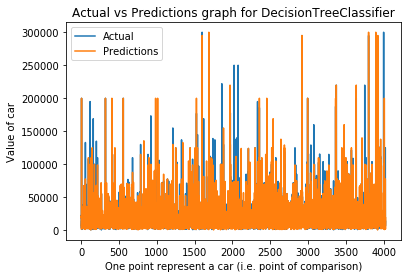

Contents of array
[[6593.943277081359, 5966.7696562864, 6091.427819383381, 6092.777826572635], [6644.837502773177, 6559.65978344412, 6870.754947606712, 6548.669493959671]]

Number of folds:3
Model name: SVC
RMSE: 10649.343826623299


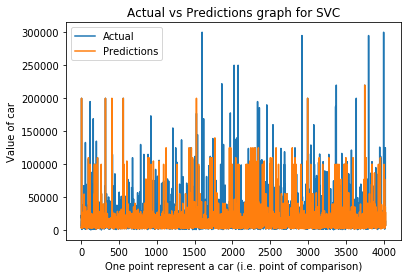

Number of folds:4
Model name: SVC
RMSE: 10704.557029079711


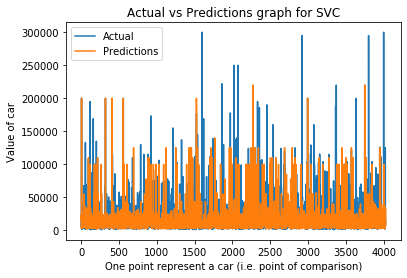

Number of folds:5
Model name: SVC
RMSE: 10820.049735147057


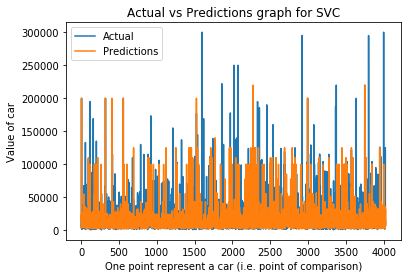

Number of folds:6
Model name: SVC
RMSE: 10745.535512351395


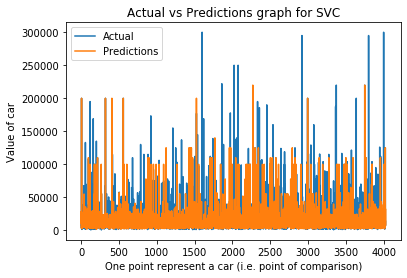

Contents of array
[[6593.943277081359, 5966.7696562864, 6091.427819383381, 6092.777826572635], [6644.837502773177, 6559.65978344412, 6870.754947606712, 6548.669493959671], [10649.343826623299, 10704.557029079711, 10820.049735147057, 10745.535512351395]]

Number of folds:3
Model name: LogisticRegression
RMSE: 11346.10541230253


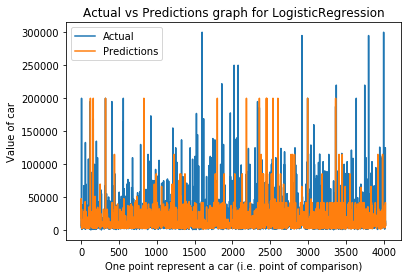

Number of folds:4
Model name: LogisticRegression
RMSE: 11079.265430030473


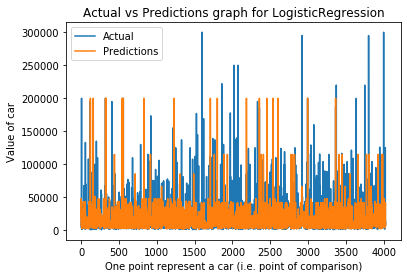

Number of folds:5
Model name: LogisticRegression
RMSE: 11326.117337238495


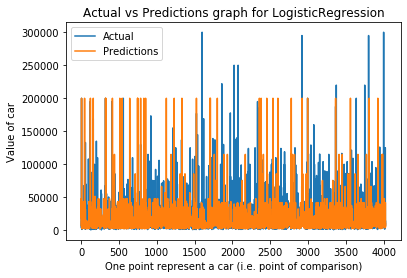

Number of folds:6
Model name: LogisticRegression
RMSE: 11212.028924262964


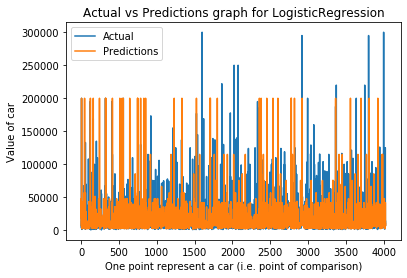

Contents of array
[[6593.943277081359, 5966.7696562864, 6091.427819383381, 6092.777826572635], [6644.837502773177, 6559.65978344412, 6870.754947606712, 6548.669493959671], [10649.343826623299, 10704.557029079711, 10820.049735147057, 10745.535512351395], [11346.10541230253, 11079.265430030473, 11326.117337238495, 11212.028924262964]]

Number of folds:3
Model name: MLPClassifier
RMSE: 11093.656008583022


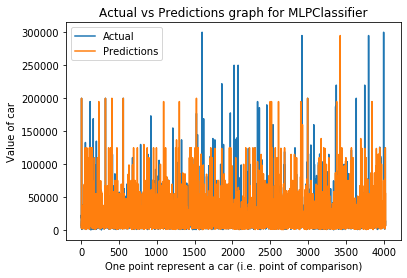

Number of folds:4
Model name: MLPClassifier
RMSE: 10915.277338888129


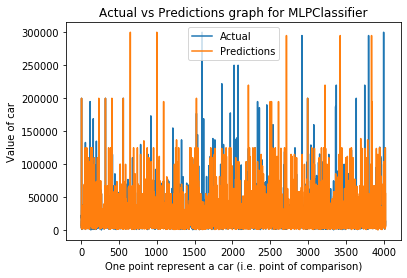

Number of folds:5
Model name: MLPClassifier
RMSE: 9746.47583084482


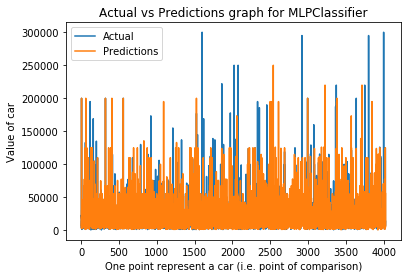

Number of folds:6
Model name: MLPClassifier
RMSE: 10624.680774323213


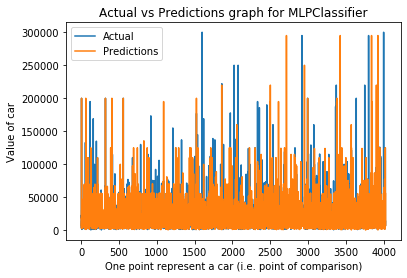

Contents of array
[[6593.943277081359, 5966.7696562864, 6091.427819383381, 6092.777826572635], [6644.837502773177, 6559.65978344412, 6870.754947606712, 6548.669493959671], [10649.343826623299, 10704.557029079711, 10820.049735147057, 10745.535512351395], [11346.10541230253, 11079.265430030473, 11326.117337238495, 11212.028924262964], [11093.656008583022, 10915.277338888129, 9746.47583084482, 10624.680774323213]]



In [48]:
cv_count = [3, 4, 5, 6] # number of folds


array_rmse = []


for model in models: 
    
    
    model_results = []
    for count in cv_count:
        
        print("Number of folds:{}".format(count))
        predictions = cross_val_predict(model, X, y, cv=count)

        rms = sqrt(mean_squared_error(y, predictions))

        print("Model name: {}".format(model.__class__.__name__))
        
        print("RMSE: {}".format(rms)) 
        
        model_results.append(rms)
        
        
        
        list_nums = []

        for x in range(1, len(predictions) + 1):
            list_nums.append(x)  


        plt.plot(list_nums, y) # blue
        plt.plot(list_nums, predictions) # orange



        plt.ylabel('Value of car')
        plt.xlabel('One point represent a car (i.e. point of comparison)')
        plt.legend(['Actual', 'Predictions'])

        plt.title("Actual vs Predictions graph for {}".format(model.__class__.__name__))
        plt.show()
        
    array_rmse.append(model_results)
    print("Contents of array")
    print(array_rmse)
    print("")

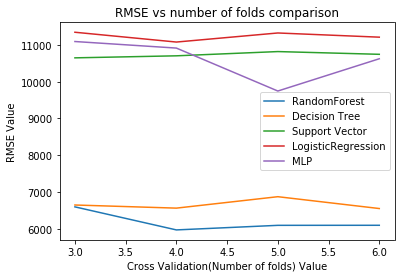

In [49]:
for x in array_rmse:
    
    
        
    plt.plot(cv_count, x)# blue
plt.xlabel('Cross Validation(Number of folds) Value')
plt.ylabel('RMSE Value')
plt.legend(['RandomForest', 'Decision Tree', 'Support Vector', 'LogisticRegression', 'MLP'])
plt.title("RMSE vs number of folds comparison")
    
    
    
plt.show()   

## TensorFlow Model

The neural network using TensorFlow is tested. Please note that this is not my own code, this example is owned by TensorFlow (https://www.tensorflow.org/tutorials/keras/regression)

In [53]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.0.0


In [54]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [58]:
def build_model():
    
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(x_train.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
  ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [59]:
model = build_model()

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [61]:
print(len(df.keys()))

9


In [62]:
x_train.shape

(4025, 8)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
EPOCHS = 1000

history = model.fit(
  X_train, y_train, 
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])




Epoch: 0, loss:1029342689.9496,  mae:19522.3281,  mse:1029342656.0000,  val_loss:987740017.3462,  val_mae:18046.9453,  val_mse:987740032.0000,  
....................................................................................................
Epoch: 100, loss:442204168.9914,  mae:11172.6338,  mse:442204128.0000,  val_loss:476907206.0910,  val_mae:11316.8555,  val_mse:476907200.0000,  
....................................................................................................
Epoch: 200, loss:327997366.9644,  mae:9084.8213,  mse:327997408.0000,  val_loss:359718016.1103,  val_mae:8579.9600,  val_mse:359717984.0000,  
....................................................................................................
Epoch: 300, loss:298391661.0673,  mae:8548.8965,  mse:298391712.0000,  val_loss:334720957.6607,  val_mae:8163.7480,  val_mse:334720928.0000,  
....................................................................................................
Epoch: 400, loss:28

In [64]:
predictions = model.predict(X_test)

In [65]:
predictions

array([[ 13289.13   ],
       [  9445.342  ],
       [ 11357.045  ],
       [ 15240.36   ],
       [  7941.0825 ],
       [ 18299.594  ],
       [ 73083.81   ],
       [ 61182.82   ],
       [ 35367.68   ],
       [  4730.3936 ],
       [  9928.586  ],
       [  2984.2776 ],
       [ 11122.962  ],
       [ 85526.734  ],
       [  9636.429  ],
       [ 24534.371  ],
       [ 49382.35   ],
       [ 11653.132  ],
       [ 34522.906  ],
       [ 22203.666  ],
       [ 17437.596  ],
       [ 30646.07   ],
       [ 32484.193  ],
       [  3916.032  ],
       [ 13371.513  ],
       [ 17363.252  ],
       [  4241.094  ],
       [  9201.747  ],
       [  8121.744  ],
       [ 14040.073  ],
       [ 29948.428  ],
       [ 29326.582  ],
       [ 76931.95   ],
       [ 33561.043  ],
       [ 22170.297  ],
       [  6187.1562 ],
       [ 20559.238  ],
       [ 28932.89   ],
       [  7083.7114 ],
       [ 12209.28   ],
       [ 20502.543  ],
       [ 10768.268  ],
       [  7204.7754 ],
       [ 14

In [66]:
predictions = predictions.astype(int)

In [67]:
predictions

array([[ 13289],
       [  9445],
       [ 11357],
       [ 15240],
       [  7941],
       [ 18299],
       [ 73083],
       [ 61182],
       [ 35367],
       [  4730],
       [  9928],
       [  2984],
       [ 11122],
       [ 85526],
       [  9636],
       [ 24534],
       [ 49382],
       [ 11653],
       [ 34522],
       [ 22203],
       [ 17437],
       [ 30646],
       [ 32484],
       [  3916],
       [ 13371],
       [ 17363],
       [  4241],
       [  9201],
       [  8121],
       [ 14040],
       [ 29948],
       [ 29326],
       [ 76931],
       [ 33561],
       [ 22170],
       [  6187],
       [ 20559],
       [ 28932],
       [  7083],
       [ 12209],
       [ 20502],
       [ 10768],
       [  7204],
       [ 14669],
       [  9586],
       [ 10850],
       [  6558],
       [ 25456],
       [  8956],
       [ 32293],
       [  4457],
       [ 89605],
       [  5826],
       [ 14178],
       [ 16006],
       [ 36706],
       [ 15009],
       [ 34561],
       [  8963

Model name: Sequential
RMSE: 8699.281397406656


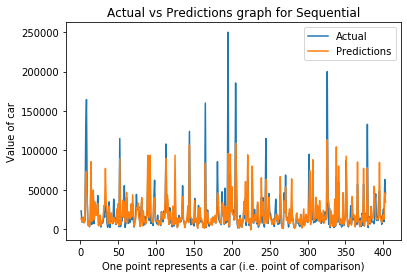

In [72]:
    
    
    rms = sqrt(mean_squared_error(y_test, predictions))
    
    print("Model name: {}".format(model.__class__.__name__))
    print("RMSE: {}".format(rms)) 
          
    list_nums = []

    for x in range(1, len(predictions) + 1):
        list_nums.append(x)  
          
          
    plt.plot(list_nums, y_test) # blue
    plt.plot(list_nums, predictions) # orange
 
 

    plt.ylabel('Value of car')
    plt.xlabel('One point represents a car (i.e. point of comparison)')
    plt.legend(['Actual', 'Predictions'])

    plt.title("Actual vs Predictions graph for {}".format(model.__class__.__name__))
    plt.show()